In [1]:
import numpy as np
import pandas as pd
import os
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
path = '/content/drive/My Drive/Capstone/DeepFakeData'
# reading file names
train_files = os.listdir(os.path.join(path, 'train_sample_videos'))
train_files.remove('metadata.json')
test_files = os.listdir(os.path.join(path, 'test_videos'))

print(f'Number of Train files: {len(train_files)}\nNumber of Test files: {len(test_files)}')

Number of Train files: 400
Number of Test files: 42


In [5]:
train_dir = '/content/drive/My Drive/Capstone/DeepFakeData/train_sample_videos/'
train_video_files = [train_dir + x for x in os.listdir(train_dir)]
test_dir = '/content/drive/My Drive/Capstone/DeepFakeData/test_videos/'
test_video_files = [test_dir + x for x in os.listdir(test_dir)]

In [6]:
labels_df = pd.read_json(os.path.join(path, 'train_sample_videos/metadata.json'))
labels_df = labels_df.T
print(labels_df.shape)
labels_df.head()

(400, 3)


,label,split,original
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
abarnvbtwb.mp4,REAL,train,None
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4


In [7]:
df_train = pd.read_json('/content/drive/My Drive/Capstone/DeepFakeData/train_sample_videos/metadata.json').transpose()
df_train.head()

,label,split,original
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
abarnvbtwb.mp4,REAL,train,None
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4


In [24]:
labels_df.shape

(400, 3)

In [8]:
labels_df['label'].value_counts()

FAKE    323
REAL     77
Name: label, dtype: int64

In [9]:
# gets the frame size for a video
def get_frame_size(file):
    cap = cv2.VideoCapture(file)
    ret, frame = cap.read()
    #plt.imshow(frame)
    shape = frame.shape
    cap.release()
    return shape

In [10]:
# gets the fps and duration of video
def get_video_length(file):
    cap = cv2.VideoCapture(file)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = frame_count/fps
    cap.release()
    return round(fps), round(duration)

In [12]:
# extract metadata of all files and return in a dataframe
def extract_metadata(files, path):
    frame_size_list = []
    fps_list = []
    duration_list = []
    for i in tqdm(files):
        shape = get_frame_size(os.path.join(path,f'{i}'))
        fps, duration = get_video_length(os.path.join(path,f'{i}'))
        frame_size_list.append(shape)
        fps_list.append(fps)
        duration_list.append(duration)

    meta_df = pd.DataFrame(data={'frame_shape':frame_size_list, 'fps':fps_list, 'duration':duration_list}, index=files)
    return meta_df

print(get_frame_size(os.path.join(path, 'train_sample_videos/aagfhgtpmv.mp4')))
print(get_video_length(os.path.join(path, 'train_sample_videos/aagfhgtpmv.mp4')))

(1080, 1920, 3)
(30, 10)


In [13]:
# getting metadata for train files
train_meta = extract_metadata(train_files, os.path.join(path, 'train_sample_videos'))
train_meta.head()

100%|██████████| 400/400 [06:56<00:00,  1.04s/it]


,frame_shape,fps,duration
acifjvzvpm.mp4,"(1080, 1920, 3)",30,10
abarnvbtwb.mp4,"(1080, 1920, 3)",30,10
abofeumbvv.mp4,"(1080, 1920, 3)",30,10
aapnvogymq.mp4,"(1080, 1920, 3)",30,10
aagfhgtpmv.mp4,"(1080, 1920, 3)",30,10


In [25]:
type(train_meta)

pandas.core.frame.DataFrame

In [15]:
train_meta.frame_shape.value_counts()

(1080, 1920, 3)    375
(1920, 1080, 3)     25
Name: frame_shape, dtype: int64

In [16]:
train_meta.fps.value_counts()

30    400
Name: fps, dtype: int64

In [17]:
print('Duration in seconds')
print(train_meta.duration.value_counts())

Duration in seconds
10    400
Name: duration, dtype: int64


In [18]:
# set video file path of input video with name and extension
vid = cv2.VideoCapture('VideoPath')


if not os.path.exists('images'):
    os.makedirs('images')

#for frame identity
index = 0
while(True):
    # Extract images
    ret, frame = vid.read()
    # end of frames
    if not ret: 
        break
    # Saves images
    name = './images/frame' + str(index) + '.jpg'
    print ('Creating...' + name)
    cv2.imwrite(name, frame)

    # next frame
    index += 1

# **EDA OF TEST VIDEO FILES**

In [19]:
# getting metadata for test files
test_meta = extract_metadata(test_files, os.path.join(path, 'test_videos'))
test_meta.head()

100%|██████████| 42/42 [00:47<00:00,  1.13s/it]


,frame_shape,fps,duration
aomqqjipcp.mp4,"(1080, 1920, 3)",30,10
acazlolrpz.mp4,"(1080, 1920, 3)",30,10
aassnaulhq.mp4,"(1080, 1920, 3)",30,10
ajiyrjfyzp.mp4,"(1080, 1920, 3)",30,10
adohdulfwb.mp4,"(1080, 1920, 3)",30,10


In [20]:
test_meta.frame_shape.value_counts()

(1080, 1920, 3)    38
(1920, 1080, 3)     4
Name: frame_shape, dtype: int64

In [21]:
test_meta.fps.value_counts()

30    42
Name: fps, dtype: int64

In [22]:
test_meta.duration.value_counts()

10    42
Name: duration, dtype: int64

In [23]:
type(test_meta)

pandas.core.frame.DataFrame

#All videos are of 10 seconds and in 30 fps(frame persecond)
#Videos are in 2 frame sizes:
1080 X 1920

1920 X 1080

In [26]:
df=train_meta.append(test_meta)

In [27]:
df.shape

(442, 3)

In [28]:
final_data=df.merge(labels_df, how='inner', on=None, left_on=None, right_on=None, left_index=True, right_index=True)

In [29]:
final_data.shape

(400, 6)

In [30]:
final_data.head()

,frame_shape,fps,duration,label,split,original
acifjvzvpm.mp4,"(1080, 1920, 3)",30,10,FAKE,train,kbvibjhfzo.mp4
abarnvbtwb.mp4,"(1080, 1920, 3)",30,10,REAL,train,None
abofeumbvv.mp4,"(1080, 1920, 3)",30,10,FAKE,train,atvmxvwyns.mp4
aapnvogymq.mp4,"(1080, 1920, 3)",30,10,FAKE,train,jdubbvfswz.mp4
aagfhgtpmv.mp4,"(1080, 1920, 3)",30,10,FAKE,train,vudstovrck.mp4


In [58]:
fram1080_1920=final_data[final_data["frame_shape"]==(1080, 1920, 3)]
fram1920_1080=final_data[final_data["frame_shape"]==(1920, 1080, 3)]

In [59]:
fram1080_1920.shape

(375, 6)

In [60]:
fram1080_1920.label.value_counts()

FAKE    302
REAL     73
Name: label, dtype: int64

In [61]:
fram1920_1080.shape

(25, 6)

In [62]:
fram1920_1080.label.value_counts()

FAKE    21
REAL     4
Name: label, dtype: int64

In [63]:
data1920_1080=fram1920_1080[fram1920_1080['label']=='REAL']
a=fram1920_1080[fram1920_1080['label']=='FAKE']
a1=a.head(4)
data1=data1920_1080.append(a1)
data1.shape

(8, 6)

In [64]:
data1080_1920=fram1080_1920[fram1080_1920['label']=='REAL']
data1080_1920_a=data1080_1920.head(4)
b=fram1080_1920[fram1080_1920['label']=='FAKE']
b1=b.head(4)
data2=data1080_1920_a.append(b1)
data2.shape

(8, 6)

In [65]:
mix_data=data1.append(data2)
mix_data

,frame_shape,fps,duration,label,split,original
afoovlsmtx.mp4,"(1920, 1080, 3)",30,10,REAL,train,None
beboztfcme.mp4,"(1920, 1080, 3)",30,10,REAL,train,None
cppdvdejkc.mp4,"(1920, 1080, 3)",30,10,REAL,train,None
ddepeddixj.mp4,"(1920, 1080, 3)",30,10,REAL,train,None
acxwigylke.mp4,"(1920, 1080, 3)",30,10,FAKE,train,ffcwhpnpuw.mp4
alaijyygdv.mp4,"(1920, 1080, 3)",30,10,FAKE,train,cppdvdejkc.mp4
alvgwypubw.mp4,"(1920, 1080, 3)",30,10,FAKE,train,vcxckqbaya.mp4
alninxcyhg.mp4,"(1920, 1080, 3)",30,10,FAKE,train,tqhbgzfwsf.mp4
abarnvbtwb.mp4,"(1080, 1920, 3)",30,10,REAL,train,None
aelfnikyqj.mp4,"(1080, 1920, 3)",30,10,REAL,train,None


In [39]:
final_data['label'].value_counts()

FAKE    323
REAL     77
Name: label, dtype: int64

In [40]:
final_data.original.nunique()

209

In [66]:
#How many video has been made fake from single video.
final_data['original'].value_counts()

meawmsgiti.mp4    6
atvmxvwyns.mp4    6
qeumxirsme.mp4    5
kgbkktcjxf.mp4    5
qzklcjjxdq.mp4    4
                 ..
xqnykluhws.mp4    1
kdodrvufdh.mp4    1
fewcljwqkr.mp4    1
brwrlczjvi.mp4    1
mfnowqfdwl.mp4    1
Name: original, Length: 209, dtype: int64

In [42]:
final_data[final_data['original']=='ywvlvpvroj.mp4']  # Looking the same files of videos

,frame_shape,fps,duration,label,split,original
brvqtabyxj.mp4,"(1080, 1920, 3)",30,10,FAKE,train,ywvlvpvroj.mp4
bweezhfpzp.mp4,"(1080, 1920, 3)",30,10,FAKE,train,ywvlvpvroj.mp4
deyyistcrd.mp4,"(1080, 1920, 3)",30,10,FAKE,train,ywvlvpvroj.mp4
eixwxvxbbn.mp4,"(1080, 1920, 3)",30,10,FAKE,train,ywvlvpvroj.mp4


In [67]:
video1= train_dir + 'brvqtabyxj.mp4'  
video2 =train_dir + 'bweezhfpzp.mp4'
video3 =train_dir + 'deyyistcrd.mp4'

In [68]:
def display_img(video):
    cap = cv2.VideoCapture(video)  # take 1 picture
    ret, frame = cap.read()
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    ax.imshow(frame)

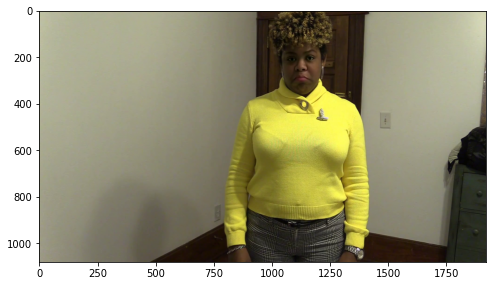

In [46]:
display_img(video1)

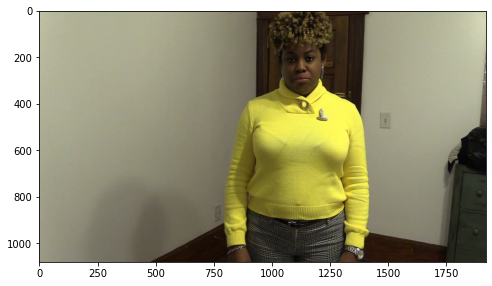

In [47]:
display_img(video2)

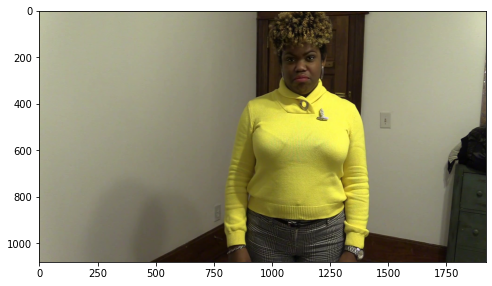

In [48]:
display_img(video3)

In [49]:
first_Video = train_video_files[2]
first_Video

'/content/drive/My Drive/Capstone/DeepFakeData/train_sample_videos/abofeumbvv.mp4'

In [50]:
count = 0
cap = cv2.VideoCapture('brvqtabyxj.mp4')
ret,frame = cap.read()

while count < 3:
    cap.set(cv2.CAP_PROP_POS_MSEC,(count*1000))   
    ret,frame = cap.read()
    if count == 0:
        image0 = frame
    elif count == 1:
        image1 = frame
    elif count == 2:
        image2 = frame
    
    #cv2.imwrite( filepath+ "\frame%d.jpg" % count, image)     # Next I will save frame as JPEG
    count = count + 1

In [71]:
def display(img):
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ax.imshow(img)

TypeError: ignored

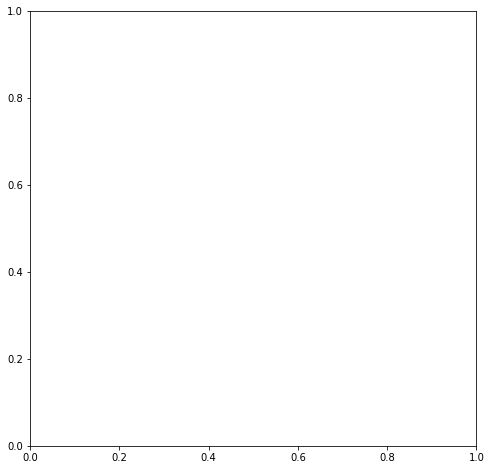

In [72]:
display(image0)

In [55]:
final_data.head()

,frame_shape,fps,duration,label,split,original
acifjvzvpm.mp4,"(1080, 1920, 3)",30,10,FAKE,train,kbvibjhfzo.mp4
abarnvbtwb.mp4,"(1080, 1920, 3)",30,10,REAL,train,None
abofeumbvv.mp4,"(1080, 1920, 3)",30,10,FAKE,train,atvmxvwyns.mp4
aapnvogymq.mp4,"(1080, 1920, 3)",30,10,FAKE,train,jdubbvfswz.mp4
aagfhgtpmv.mp4,"(1080, 1920, 3)",30,10,FAKE,train,vudstovrck.mp4


In [56]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
